#Problem Statement:


---



**You are a data analyst at a company that monitors website traffic over time.
You need to visualize this data using a horizon chart to easily identify trends
and patterns. The data includes daily visits to the website over the past year.
Create a horizon chart of this time series data. Generate synthetic data for
the purpose of this exercise. Ensure the code efficiently processes and
visualizes the data.Requirements:Generate daily website traffic data for the
past year.Process the data to prepare it for visualization.Create a horizon
chart to visualize the trends and patterns in the data.**


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2023-12-31")
traffic = np.random.poisson(lam=200, size=len(dates))


In [ ]:
data = pd.DataFrame({"Date": dates, "Traffic": traffic})
data["Traffic_MA"] = data["Traffic"].rolling(window=7).mean().fillna(method='bfill')
print(data.head())


        Date  Traffic  Traffic_MA
0 2023-01-01      195       198.0
1 2023-01-02      210       198.0
2 2023-01-03      184       198.0
3 2023-01-04      204       198.0
4 2023-01-05      216       198.0


<ipython-input-19-50166f3fcb47>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Traffic_MA"] = data["Traffic"].rolling(window=7).mean().fillna(method='bfill')


In [ ]:
# Normalize the data for horizon chart
data["Traffic_MA_Norm"] = (data["Traffic_MA"] - data["Traffic_MA"].mean()) / data["Traffic_MA"].std()
print(data.head())

        Date  Traffic  Traffic_MA  Traffic_MA_Norm
0 2023-01-01      195       198.0        -0.098798
1 2023-01-02      210       198.0        -0.098798
2 2023-01-03      184       198.0        -0.098798
3 2023-01-04      204       198.0        -0.098798
4 2023-01-05      216       198.0        -0.098798


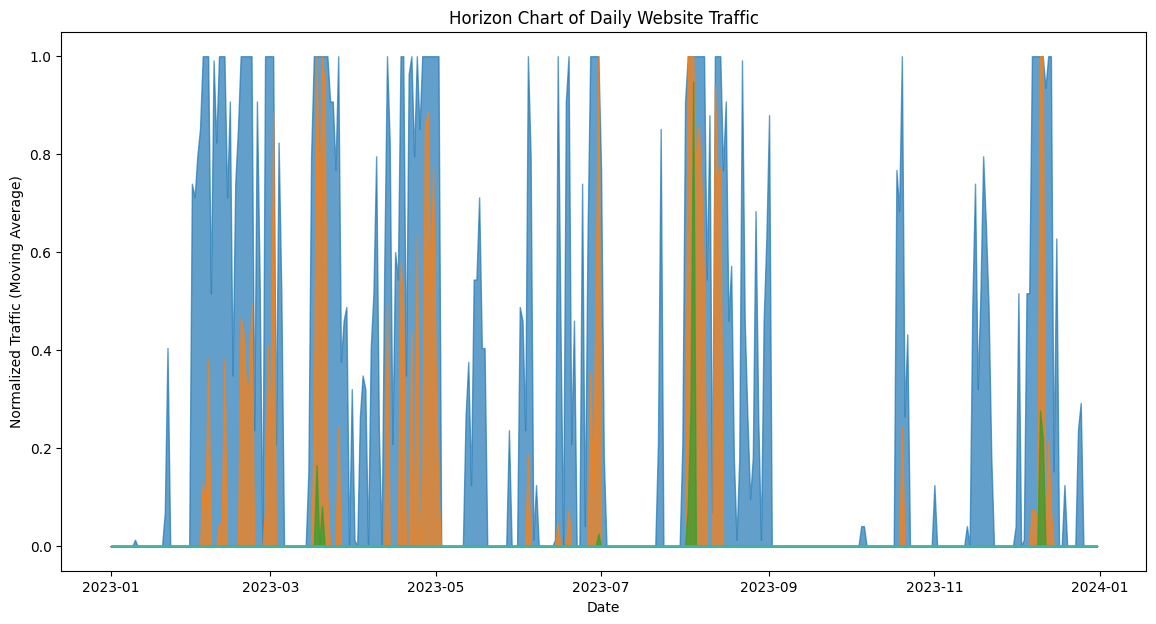

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
for i, color in enumerate(colors):
    layer = np.maximum(0, data["Traffic_MA_Norm"] - i) - np.maximum(0, data["Traffic_MA_Norm"] - (i + 1))
    ax.fill_between(data["Date"], layer, color=color, alpha=0.7)

ax.set_title("Horizon Chart of Daily Website Traffic")
ax.set_xlabel("Date")
ax.set_ylabel("Normalized Traffic (Moving Average)")

plt.show()
